# Exploratory Data Analysis - Senior Center Client Data
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import geopandas as gpd
from senior_center_fy2020_data import sccd

In [2]:
sccd.columns

Index(['DFTA ID', 'Service Date', 'Total Daily Services',
       'Total Breakfasts Served', 'Total Lunches Served',
       'Total Dinners Served', 'Total Meals Served', 'Total AIB Services',
       'Total SCE Services', 'Total HPP Services', 'Total Clients Served',
       'Senior Center Name', 'Site Type', 'Borough', 'Meal Prep Type',
       'Meal Prep For Other Centers', 'Total Employees',
       'Client to Staff Ratio', 'PTE Status', 'Service Month',
       'Service Month as Num', 'Service Day of Week', 'Fiscal Quarter'],
      dtype='object')

In [3]:
# Get the sample size (n) for each grouping variable
for col in ['Service Month', 'Service Day of Week', 'Fiscal Quarter', 'Site Type', 'Borough', 'Meal Prep Type', 'Meal Prep For Other Centers', 'PTE Status']:
    print(f'{sccd.value_counts(col)}\n')

Service Month
July 2019         5963
August 2019       5921
October 2019      5797
January 2020      5772
December 2019     5641
September 2019    5384
March 2020        5355
February 2020     5240
November 2019     5198
June 2020         5159
April 2020        4383
May 2020          4361
dtype: int64

Service Day of Week
Tuesday      12935
Friday       12465
Wednesday    12404
Thursday     12368
Monday       12055
Saturday      1110
Sunday         837
dtype: int64

Fiscal Quarter
Q1    17268
Q2    16636
Q3    16367
Q4    13903
dtype: int64

Site Type
Neighborhood Senior Centers    59137
Innovative Senior Centers       4538
Senior Center                    499
dtype: int64

Borough
Brooklyn         21030
Manhattan        16857
Queens           12646
Bronx            11080
Staten Island     2561
dtype: int64

Meal Prep Type
Meal Prep On-Site    35504
Catered              23053
Both                  2971
Not Applicable        2646
dtype: int64

Meal Prep For Other Centers
No     53941
Ye

---
# Generating a quick-and-dirty correlation matrix to see what numerical variables might be related

In [4]:
numeric_cols = ['Total Daily Services', 'Total Breakfasts Served', 'Total Lunches Served',
       'Total Dinners Served', 'Total Meals Served', 'Total AIB Services',
       'Total SCE Services', 'Total HPP Services', 'Total Clients Served']

# Compute a correlation matrix and assign to corr_matrix
corr_matrix = sccd[numeric_cols].corr('pearson')

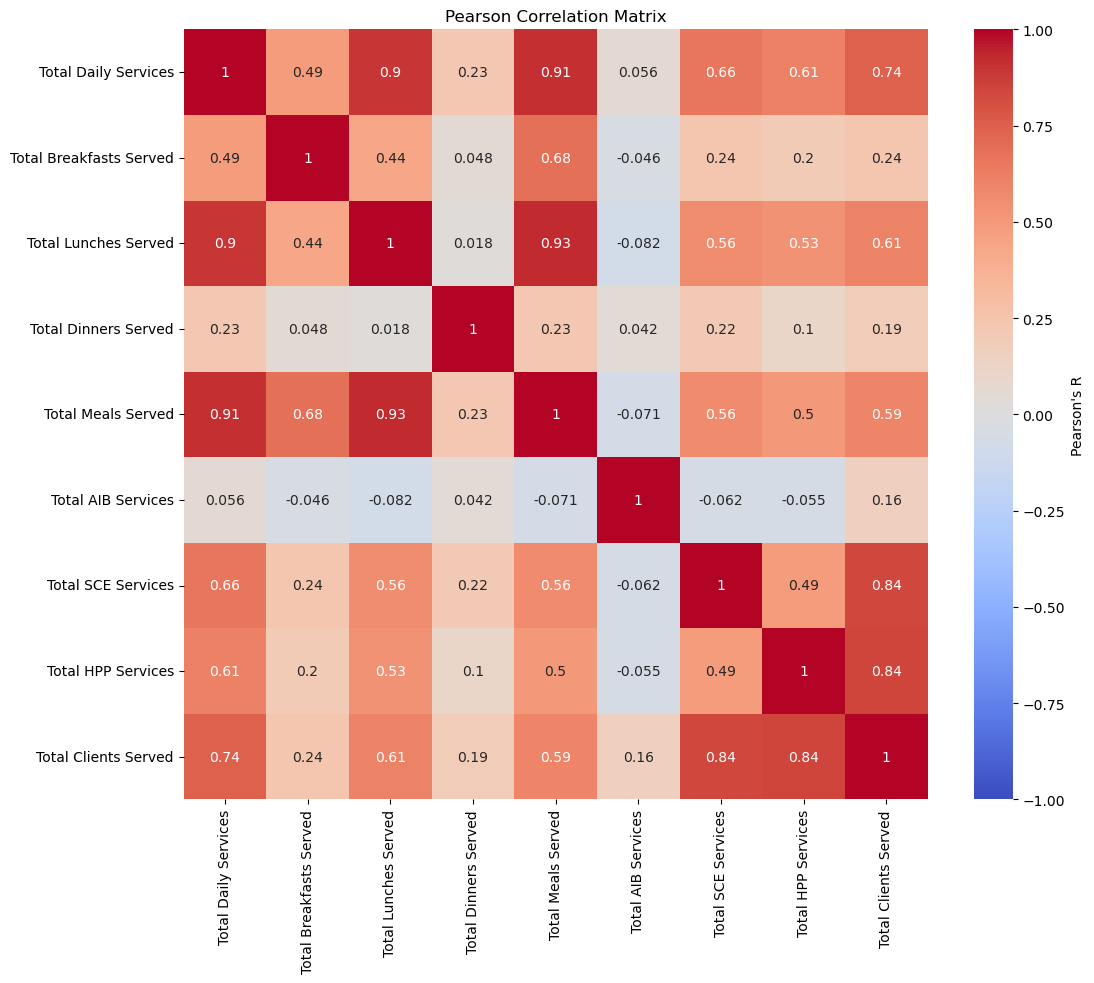

In [5]:
# Plot a heatmap from corr_matrix
plt.figure(figsize = (12, 10))

sns.heatmap(corr_matrix, vmin = -1.0, vmax = 1.0, annot = True, cmap = 'coolwarm',
            cbar_kws = {
                'label': 'Pearson\'s R',
                'orientation': 'vertical'
            }).set(title = 'Pearson Correlation Matrix')

plt.show()

---
# Grouping by Borough

## What is the total instances of service (i.e. annual count of meal services, AIB, SCE, & HPP services, and other services combined) for each borough?

In [6]:
total_services_df = sccd.groupby('Borough')['Total Daily Services'].sum()
total_services_df

Borough
Bronx             776310
Brooklyn         1619225
Manhattan        1587300
Queens           1293041
Staten Island     213178
Name: Total Daily Services, dtype: int64

## What is the total number of clients served (i.e. annual client count) for each borough?

In [7]:
total_clients_df = sccd.groupby('Borough')['Total Clients Served'].sum()
total_clients_df

Borough
Bronx            437020
Brooklyn         906112
Manhattan        740499
Queens           689310
Staten Island    142972
Name: Total Clients Served, dtype: int64

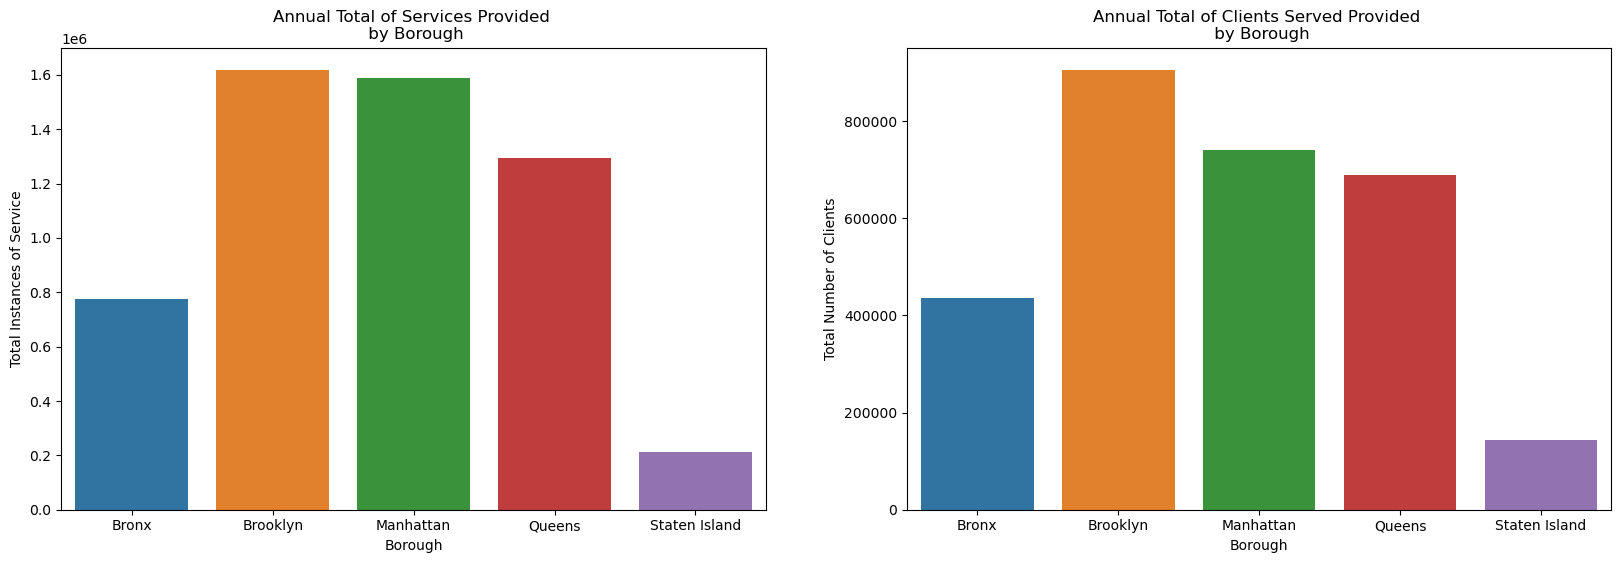

In [8]:
# Create figure for annual services and annual clients
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x = total_services_df.index, y = total_services_df.values).set(title = 'Annual Total of Services Provided \n by Borough', ylabel = 'Total Instances of Service')

plt.subplot(1, 2, 2)
sns.barplot(x = total_clients_df.index, y = total_clients_df.values).set(title = 'Annual Total of Clients Served Provided \n by Borough', ylabel = 'Total Number of Clients')

plt.show()

## What is the total number of meals served (i.e. annual meal count) for each borough?

In [9]:
total_meals_df = sccd.groupby('Borough')['Total Meals Served'].sum()
total_meals_df

Borough
Bronx             687533
Brooklyn         1441437
Manhattan        1316693
Queens            954535
Staten Island     201532
Name: Total Meals Served, dtype: int64

## What is the total number of AIB services (i.e. Assistance, Information and Benefits) for the year by borough?

In [10]:
total_aib_df = sccd.groupby('Borough')['Total AIB Services'].sum()
total_aib_df

Borough
Bronx             38812
Brooklyn         104044
Manhattan        112179
Queens            67045
Staten Island     10307
Name: Total AIB Services, dtype: int64

## What is the total number of SCE services (i.e. Education, Recreation, Technology) for the year by borough?

In [11]:
total_sce_df = sccd.groupby('Borough')['Total SCE Services'].sum()
total_sce_df

Borough
Bronx            215970
Brooklyn         398123
Manhattan        341392
Queens           304907
Staten Island     65786
Name: Total SCE Services, dtype: int64

## What is the total number of HPP services (i.e.  Health Promotion (Evidence-Based and Non-Evidence-Based)) for the year by borough?

In [12]:
total_hpp_df = sccd.groupby('Borough')['Total HPP Services'].sum()
total_hpp_df

Borough
Bronx            182238
Brooklyn         403945
Manhattan        286928
Queens           317358
Staten Island     66879
Name: Total HPP Services, dtype: int64

In [13]:
# Combine dataframes for total meal, AIB, SCE, and HPP services into one dataframe
total_subtype_services_df = pd.concat([total_meals_df, total_aib_df, total_sce_df, total_hpp_df], axis = 1)
total_subtype_services_df = total_subtype_services_df.rename(columns = {
    'Total Meals Served': 'Meals',
    'Total AIB Services': 'Assistance, Info, & Benefits',
    'Total SCE Services': 'Education, Recreation, & Tech',
    'Total HPP Services': 'Health Promotion'
})
total_subtype_services_df

,Meals,"Assistance, Info, & Benefits","Education, Recreation, & Tech",Health Promotion
Borough,,,,
Bronx,687533,38812,215970,182238
Brooklyn,1441437,104044,398123,403945
Manhattan,1316693,112179,341392,286928
Queens,954535,67045,304907,317358
Staten Island,201532,10307,65786,66879


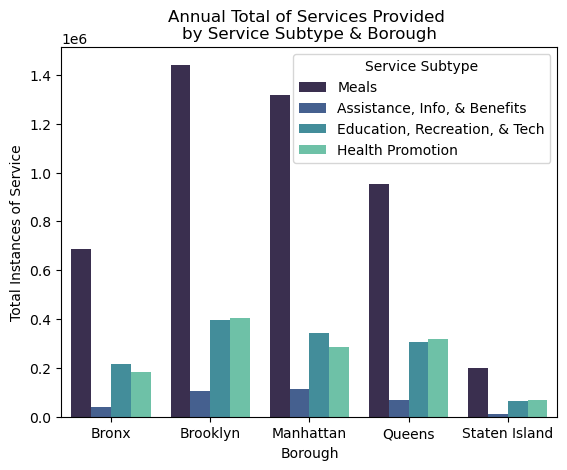

In [14]:
# Create melted dataframe that reshapes data so columns are combined into a single 'Total Instances of Service' column
melted_df = total_subtype_services_df.reset_index().melt(id_vars = 'Borough', var_name = 'Service Subtype', value_name = 'Total Instances of Service')
melted_df

# Create plot of combined services
sns.barplot(melted_df, x = 'Borough', y = 'Total Instances of Service',
            hue = 'Service Subtype', palette = 'mako').set(title = 'Annual Total of Services Provided \nby Service Subtype & Borough')
plt.show()

---
# Focusing in on the Meal Service subtype - by Borough & by Meal Prep Type
---

## How does the average number of meals served change across the year by borough?

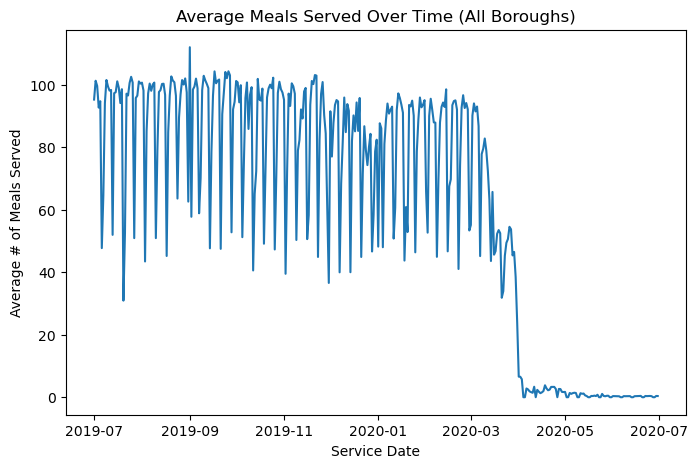

In [22]:
plt.figure(figsize = (8, 5))
sns.lineplot(sccd, x = 'Service Date', y = 'Total Meals Served', errorbar = None).set(title = 'Average Meals Served Over Time (All Boroughs)', ylabel = 'Average # of Meals Served')
plt.show()

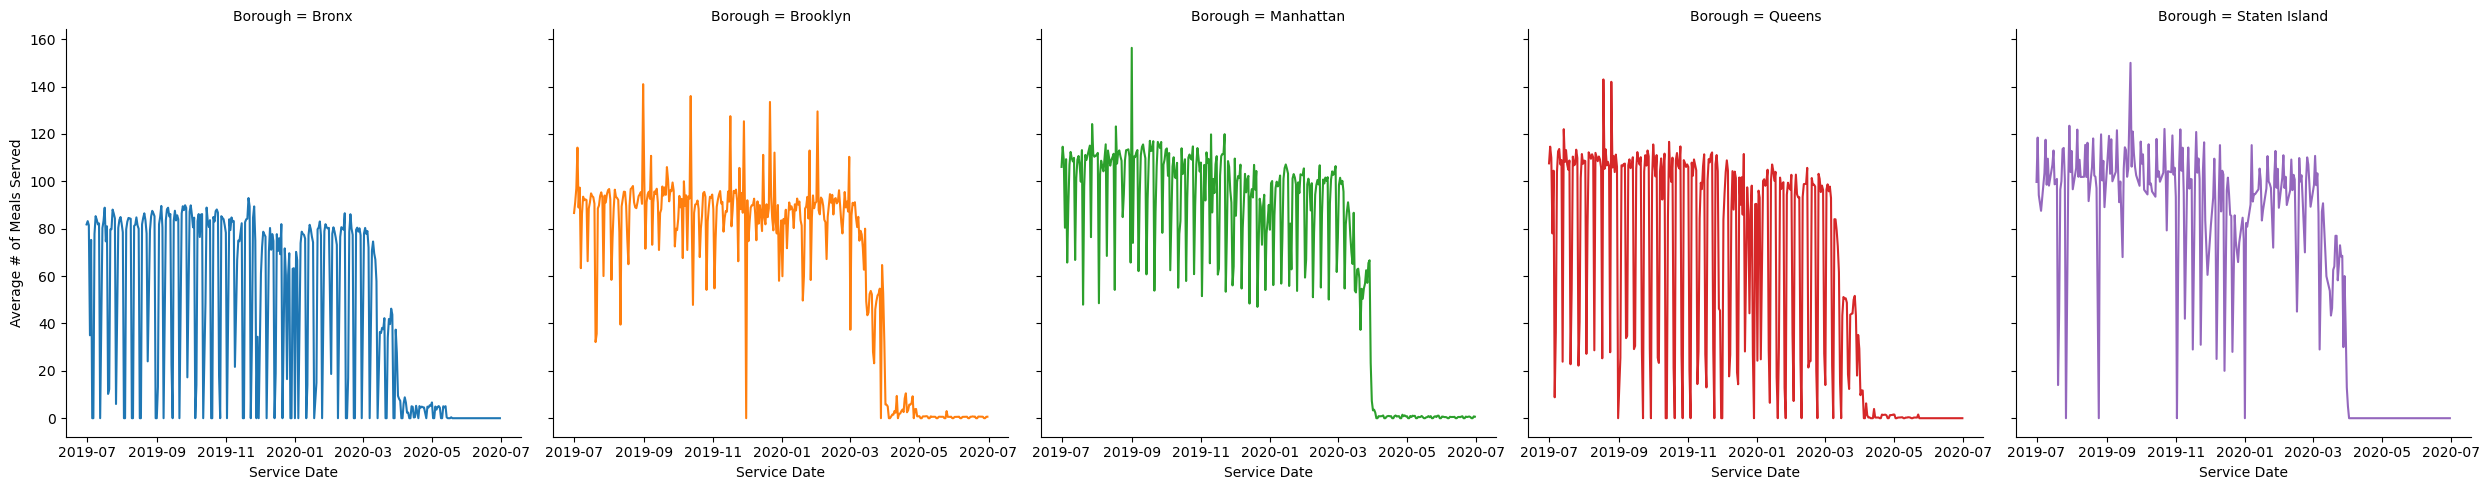

In [16]:
boroughs_facetgrid = sns.relplot(sccd, x = 'Service Date', y = 'Total Meals Served',
                                 hue = 'Borough', col = 'Borough', errorbar = None, kind = 'line',
                                 legend = False).set(ylabel = 'Average # of Meals Served')
plt.show()

## What is the total number of meals served (i.e. annual meal count) by meal prep type?

In [17]:
meals_by_type = sccd.groupby('Meal Prep Type')['Total Meals Served'].sum()
print(f'For the entire year, the total number of meals served by type is:\n\n{meals_by_type }')

For the entire year, the total number of meals served by type is:

Meal Prep Type
Both                  199242
Catered              1186525
Meal Prep On-Site    3146882
Not Applicable         69081
Name: Total Meals Served, dtype: int64


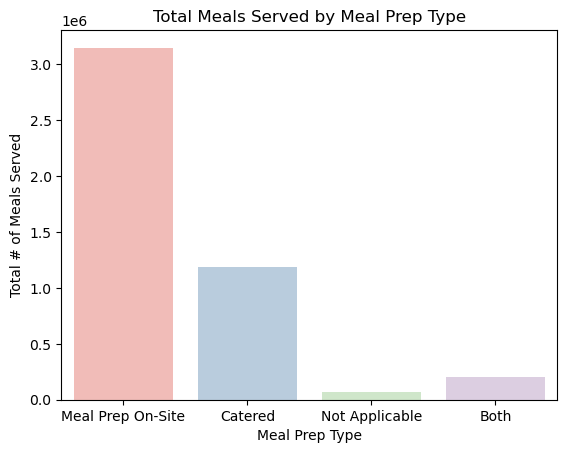

In [18]:
sns.barplot(x = meals_by_type.index, y = meals_by_type.values, order = ['Meal Prep On-Site', 'Catered', 'Not Applicable', 'Both'],
            palette = 'Pastel1').set(title = 'Total Meals Served by Meal Prep Type', ylabel = 'Total # of Meals Served')

plt.show()

## What is the average number of meals served per day for each borough by meal prep type?

In [19]:
print('The average number of meals served per day by borough & meal prep type is:')
sccd.groupby(['Borough', 'Meal Prep Type'])['Total Meals Served'].mean()

The average number of meals served per day by borough & meal prep type is:


Borough        Meal Prep Type   
Bronx          Catered               48.968836
               Meal Prep On-Site     71.632161
               Not Applicable         0.000000
Brooklyn       Both                  61.671468
               Catered               52.212293
               Meal Prep On-Site     83.113037
               Not Applicable         0.000000
Manhattan      Both                  97.235060
               Catered               45.239398
               Meal Prep On-Site    104.798238
               Not Applicable        40.328559
Queens         Both                  47.509211
               Catered               58.546677
               Meal Prep On-Site     97.711462
               Not Applicable         0.000000
Staten Island  Catered               67.306167
               Meal Prep On-Site     79.427568
               Not Applicable        93.517510
Name: Total Meals Served, dtype: float64

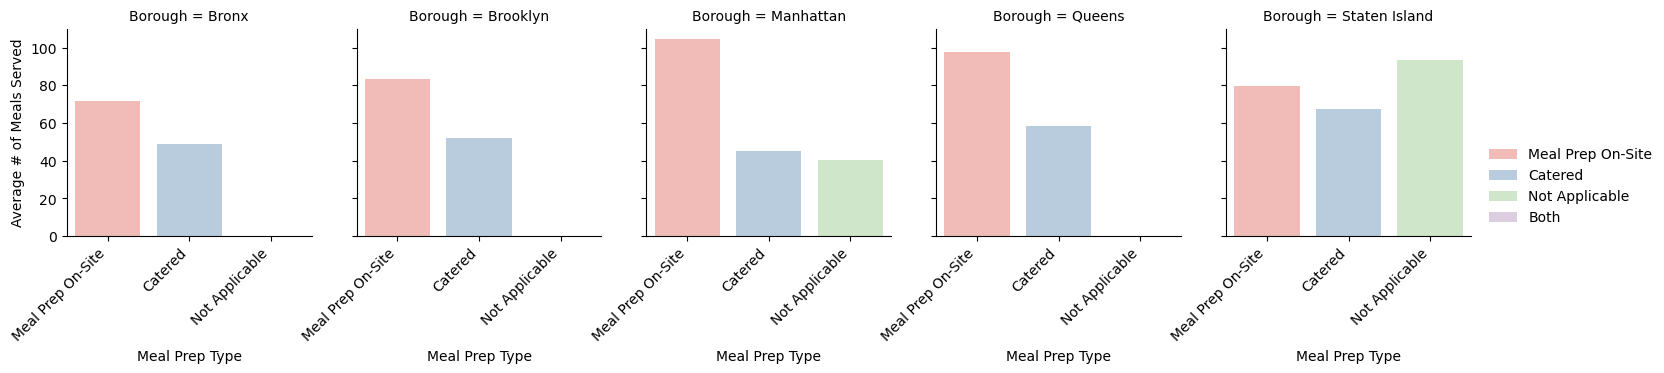

In [20]:
boroughs_facetgrid = sns.FacetGrid(sccd, col = 'Borough')
boroughs_facetgrid.map_dataframe(sns.barplot, x = 'Meal Prep Type', y = 'Total Meals Served', hue = 'Meal Prep Type', errorbar = None,
                                 palette = 'Pastel1', dodge = False).set(ylabel = 'Average # of Meals Served').add_legend()

for ax in boroughs_facetgrid.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
plt.show()

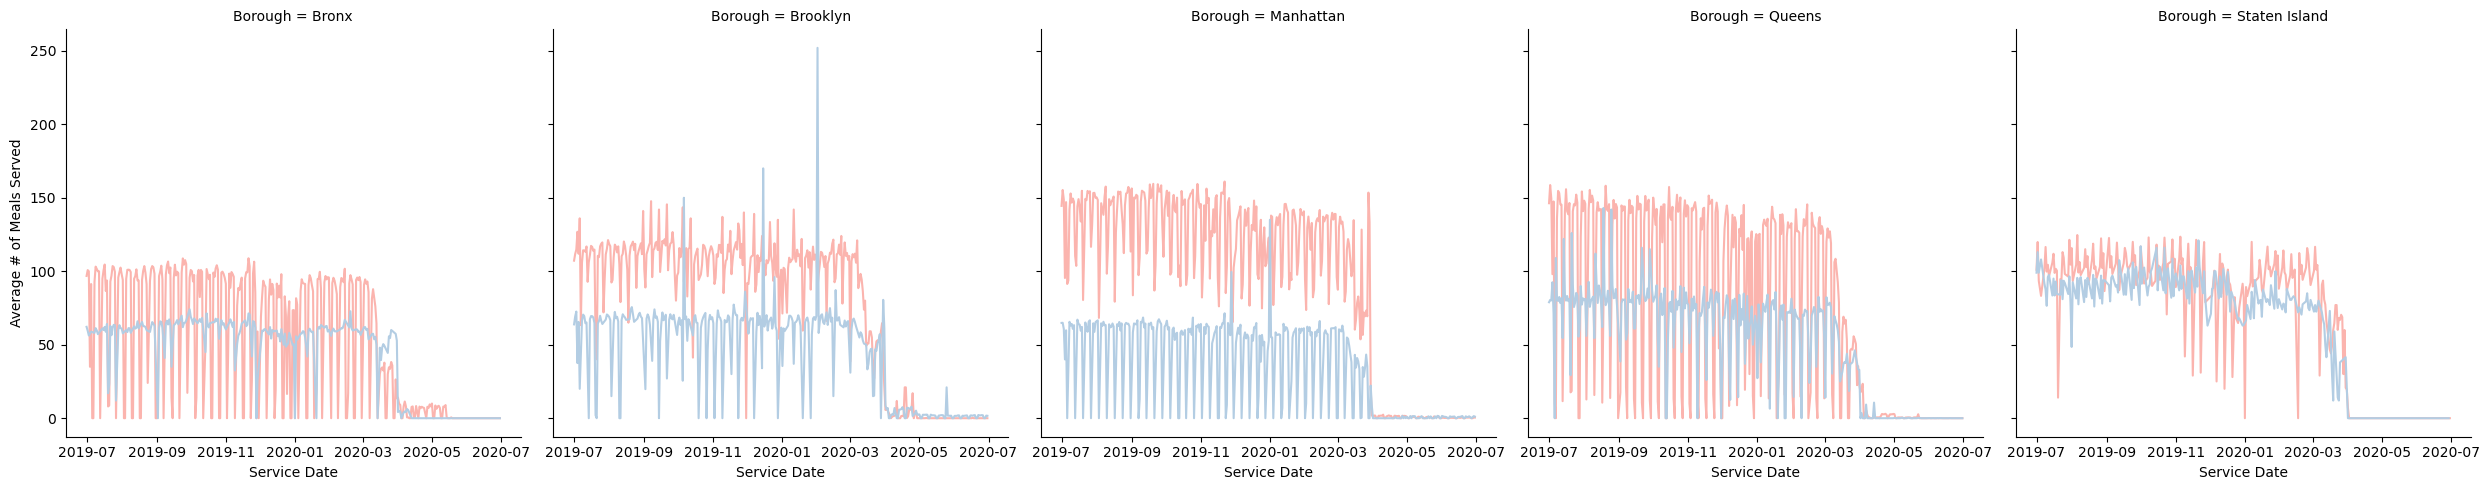

In [26]:
boroughs_facetgrid = sns.relplot(sccd[(sccd['Meal Prep Type'] == 'Meal Prep On-Site') | (sccd['Meal Prep Type'] == 'Catered')],
                                 x = 'Service Date', y = 'Total Meals Served',
                                 hue = 'Meal Prep Type', col = 'Borough', errorbar = None, kind = 'line',
                                 palette = 'Pastel1', legend = False).set(ylabel = 'Average # of Meals Served')
plt.show()

---
# Focusing in on meals served at senior centers in Brooklyn & Manhattan
---
We know that:
* Manhattan & Brooklyn have the highest annual client counts (740,499 and 906,112)
* Manhattan & Brooklyn have the highest annual number of meals served (1,316,693 and 1,441,437)
* Manhattan senior centers offering catered meals serve an average of 45 meals/day.  Brooklyn has an average of 52 catered meals/day.
* Manhattan senior centers preparing their meals on-site serve an average of 105 meals/day.  Brooklyn has an average of 83 meals/day.

In [42]:
# Create a subset of the sccd dataframe called mbk_df (pulling only rows from Brooklyn & Manhattan)
mbk_df = sccd[(sccd['Borough'] == 'Brooklyn') | (sccd['Borough'] == 'Manhattan')]
print(f'The shape with all meal prep types included is: {mbk_df.shape}')

# Further subset the data to only include rows where meal prep type is catered or on-site
mbk_df = mbk_df[(mbk_df['Meal Prep Type'] == 'Meal Prep On-Site') | (mbk_df['Meal Prep Type'] == 'Catered')]
print(f'The shape with only catered meals and meal prep on-site meals is: {mbk_df.shape}')

The shape with all meal prep types included is: (37887, 23)
The shape with only catered meals and meal prep on-site meals is: (33940, 23)


In [43]:
# Get the sample size (n) for each grouping variable by borough
for col in ['Service Month', 'Service Day of Week', 'Fiscal Quarter', 'Site Type', 'Borough', 'Meal Prep Type', 'Meal Prep For Other Centers', 'PTE Status']:
    print(f"{mbk_df.groupby('Borough')[col].value_counts()}\n")

Borough    Service Month 
Brooklyn   July 2019         1780
           August 2019       1743
           January 2020      1708
           October 2019      1663
           December 2019     1638
           March 2020        1623
           September 2019    1604
           February 2020     1540
           November 2019     1528
           June 2020         1494
           May 2020          1319
           April 2020        1313
Manhattan  October 2019      1375
           August 2019       1370
           July 2019         1370
           January 2020      1334
           December 2019     1310
           March 2020        1249
           June 2020         1237
           September 2019    1232
           February 2020     1214
           November 2019     1211
           May 2020          1054
           April 2020        1031
Name: Service Month, dtype: int64

Borough    Service Day of Week
Brooklyn   Tuesday                3831
           Wednesday              3714
           Thu

### Let's focus on these tables:

In [61]:
print('This is a table of total number of meals services (i.e. breakfast, lunch, dinner) for the year across all senior centers within a borough:')
total_meal_services = sccd.loc[(sccd['Borough'] == 'Brooklyn') | (sccd['Borough'] == 'Manhattan'), 'Borough'].value_counts()
total_meal_services

This is a table of total number of meals services (i.e. breakfast, lunch, dinner) for the year across all senior centers within a borough:


Brooklyn     21030
Manhattan    16857
Name: Borough, dtype: int64

In [62]:
print('This is a table of total number of meals services (i.e. breakfast, lunch, dinner) by meal prep type:')
tot_ms_by_meal_type = mbk_df.groupby('Borough')['Meal Prep Type'].value_counts()
tot_ms_by_meal_type

This is a table of total number of meals services (i.e. breakfast, lunch, dinner) by meal prep type:


Borough    Meal Prep Type   
Brooklyn   Meal Prep On-Site    11713
           Catered               7240
Manhattan  Meal Prep On-Site     8738
           Catered               6249
Name: Meal Prep Type, dtype: int64

In [78]:
# Calculate percent of meal services prepared on-site vs. catered for each borough
bk_perc_on_site_services = (tot_ms_by_meal_type['Brooklyn']['Meal Prep On-Site']) / (total_meal_services['Brooklyn']) * 100
bk_perc_catered_services = (tot_ms_by_meal_type['Brooklyn']['Catered']) / (total_meal_services['Brooklyn']) * 100

m_perc_on_site_services = (tot_ms_by_meal_type['Manhattan']['Meal Prep On-Site']) / (total_meal_services['Manhattan']) * 100
m_perc_catered_services = (tot_ms_by_meal_type['Manhattan']['Catered']) / (total_meal_services['Manhattan']) * 100

print(f"{round(m_perc_catered_services)}% of Manhattan's total meal services for the year are catered.")
print(f"{round(bk_perc_catered_services)}% of Brooklyn's total meal services for the year are catered.")

print(f"{round(m_perc_on_site_services)}% of Manhattan's total meal services for the year are prepared on-site.")
print(f"{round(bk_perc_on_site_services)}% of Brooklyn's total meal services for the year are prepared on-site.")

37% of Manhattan's total meal services for the year are catered.
34% of Brooklyn's total meal services for the year are catered.
52% of Manhattan's total meal services for the year are prepared on-site.
56% of Brooklyn's total meal services for the year are prepared on-site.


In [81]:
print('This is a table of the average number of meals served per day:')
mbk_df.groupby(['Borough', 'Meal Prep Type'])['Total Meals Served'].mean()

This is a table of the average number of meals served per day:


Borough    Meal Prep Type   
Brooklyn   Catered               52.212293
           Meal Prep On-Site     83.113037
Manhattan  Catered               45.239398
           Meal Prep On-Site    104.798238
Name: Total Meals Served, dtype: float64

### It's interesting that even though Brooklyn & Manhattan have similar percentages of their yearly meal services that are catered vs. prepared on site, that there is a difference in average number of meals served in a day when the meal is prepared on-site.
*(See Meal Prep On-Site, Manhattan vs. Brooklyn, in the table above.)*

### What if we look at the median number of meals served in a day instead?

In [82]:
print('This is a table of the median number of meals served per day:')
mbk_df.groupby(['Borough', 'Meal Prep Type'])['Total Meals Served'].median()

This is a table of the median number of meals served per day:


Borough    Meal Prep Type   
Brooklyn   Catered              47.0
           Meal Prep On-Site    80.0
Manhattan  Catered              41.0
           Meal Prep On-Site    88.0
Name: Total Meals Served, dtype: float64

### Interesting!  There is/are senior center(s) in Manhattan that attract a lot of clients for meals when they prepare their meals on-site.  (These senior centers pull the average number of meals served/day up for Manhattan.)

---
## Is there a relationship between total meals served per day and total number of clients per day (by borough and by meal prep type?)

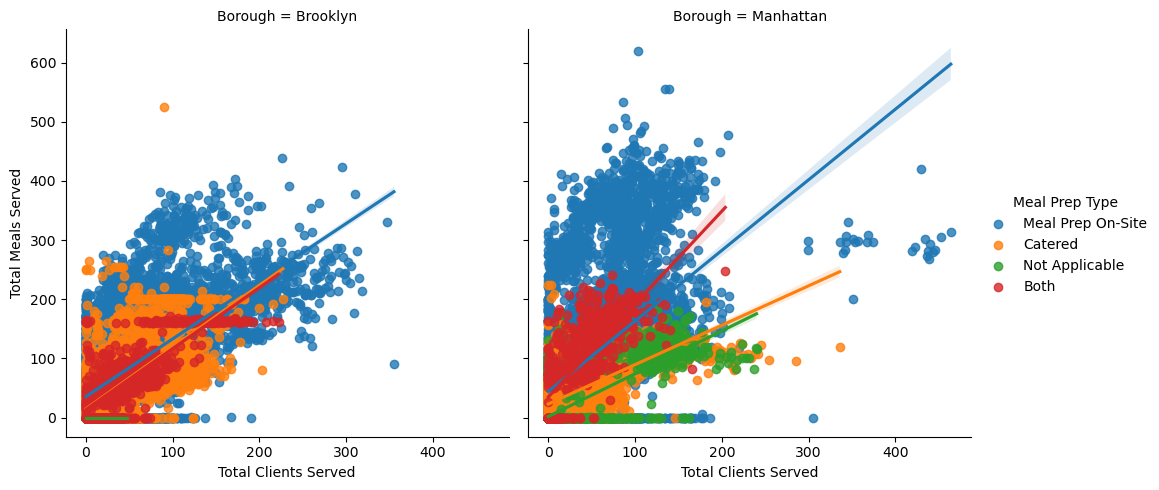

In [40]:
sns.lmplot(mbk_df, x = 'Total Clients Served', y = 'Total Meals Served', col = 'Borough', hue = 'Meal Prep Type')
plt.show()